In [1]:
import os
import matplotlib.pyplot as plt
from IPython import display

In [2]:
current_directory = os.getcwd()

In [3]:
os.chdir('images')

In [4]:
original_epi = display.Image(filename = 'EPIWeights.PNG')

In [5]:
images = {}
data_directory = os.getcwd()

for filename in os.listdir():
    if not '.PNG' in filename:
        folder_name = filename
        
        os.chdir(folder_name)
        images[folder_name] = {}
        
        for image_name in os.listdir():
            image = display.Image(filename = image_name)
            
            #image = plt.imread(image_name)
            images[folder_name][image_name] = image
            
        os.chdir(data_directory)
        
os.chdir(current_directory)

In [6]:
def images_with_string_in_name(string):
    for folder in list(images.keys()):
        for name, image in images[folder].items():
            if string in name:
                display.display(image)

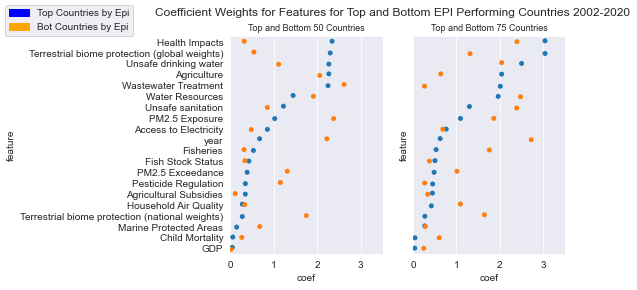

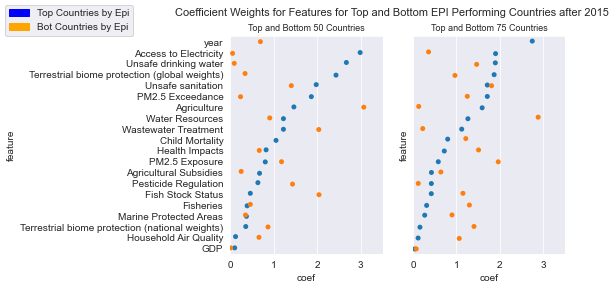

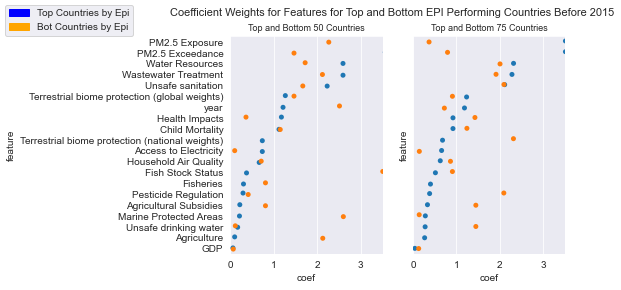

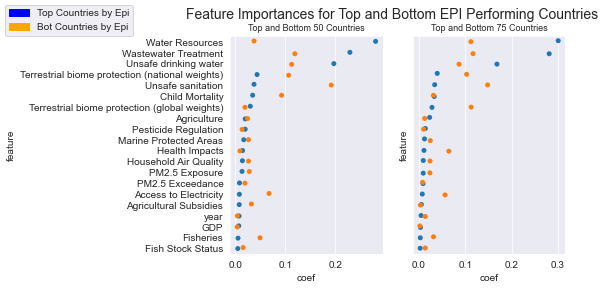

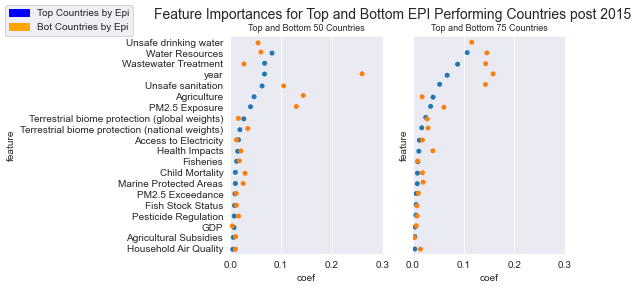

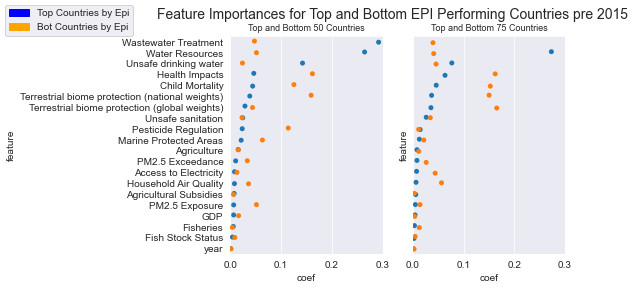

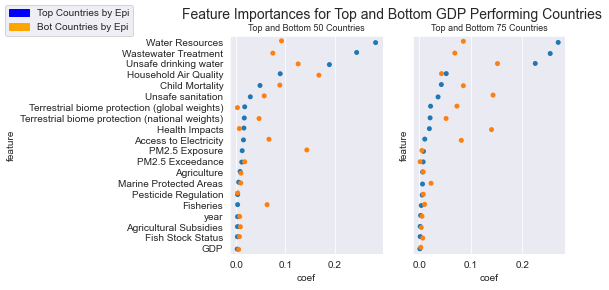

In [7]:
images_with_string_in_name('side')

***Extra Trees feature importance over time analysis***

In [8]:
list(images.keys())

['CountryCoefCatplots',
 'CountryExtraTrees',
 'CountryGDPExtraTrees',
 'ExtraTreesOverTime',
 'Presentation',
 'RidgeLinearRegressionOverTime']

In [9]:
bars = []
for name, image in images['ExtraTreesOverTime'].items():
    if 'bar' in name:
        bars.append(image)

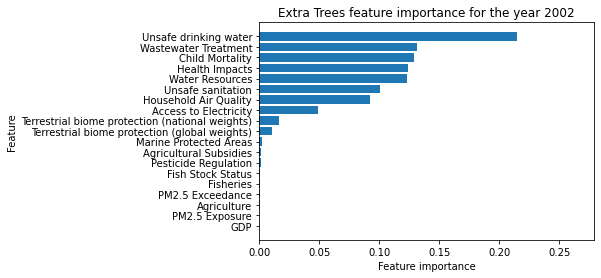

In [10]:
display.display(bars[0])

- For the first year in our dataset, we see four water and sanitation based features as high predictors for EPI, along with child mortality, health impacts, household air quality, and access to electricity. 

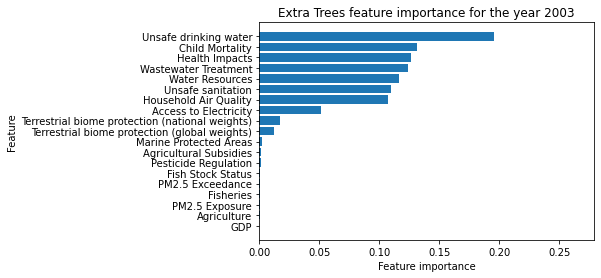

In [11]:
display.display(bars[1])

- The change from 2002 to 2003 is a minor shift among comparable feature importance values, not statistically interesting.

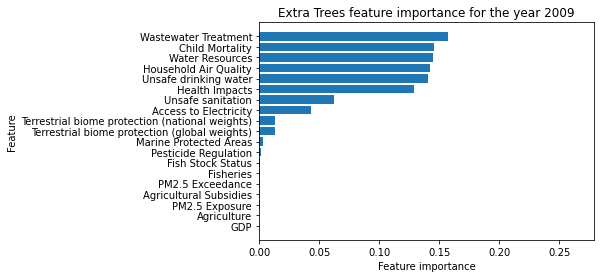

In [12]:
display.display(bars[7])

- The first year to display significant changes to model feature importances is 2009, where wastewater treatment's feature importance becomes more normalized compared to the other top features. This is around the period where more countries are providing data, which makes the lessening of single-feature importance make sense. 

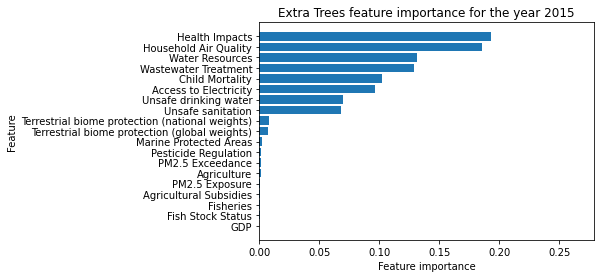

In [13]:
display.display(bars[13])

- The next large shift is in 2015, where Health Impacts and Household Air Quality make a drastic upward shift in importance. Child Mortality moves down, and Access to Electricity moves up to match it.

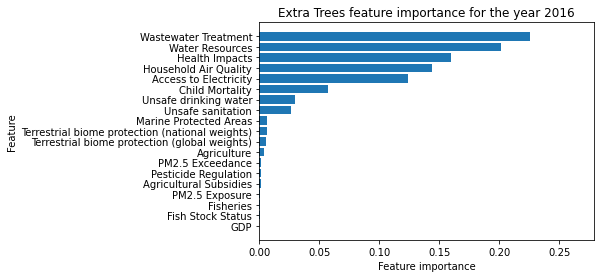

In [14]:
display.display(bars[14])

- 2016 is the beginning of high data volatility, as it is when a large number of features begin being more accurately reported by their respective countries. The EPI weighting was redefined this year. We see Marine Protected Areas and Agriculture both move from near-zero to slight importance, and a higher stratification among the original high importance features.

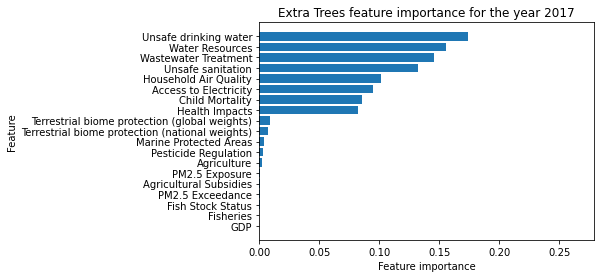

In [15]:
display.display(bars[15])

- 2017 shows a return to pre-2016 feature evalutations.

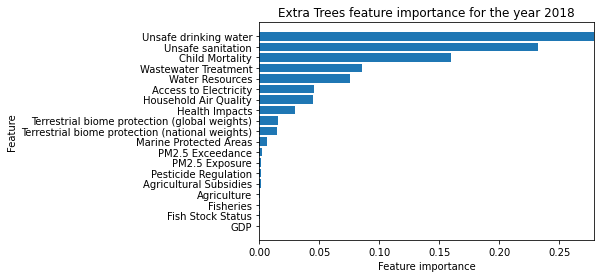

In [16]:
display.display(bars[16])

- 2018 has the largest feature importance of the entire dataset, high levels of stratification, and an elevation of Unsafe drinking water, Unsafe sanitation, and Child Mortality to higher than average levels. This does not coincide with any major water-related epidemics that I could locate in outside research.

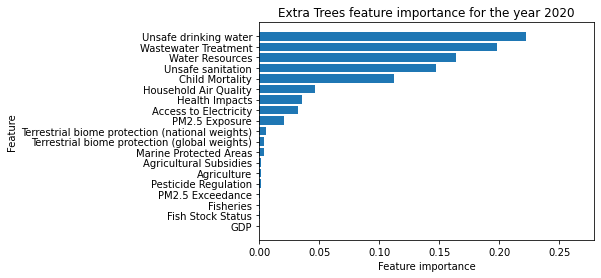

In [17]:
display.display(bars[18])

Our final plot shows the feature importances of the model with the best selection of data provided. 
- We see that of the original features of high importance from 2002 (below) Household Air Quality, Health Impacts, and Access to Electricity have all fallen far below their original levels. 
- Unsafe drinking water remains relatively constant and has maintained highest feature importance.  Child mortality remains fairly constant.
- Wastewater Treatment, Water Resources, and Unsafe sanitation all become more important features.
- PM2.5 Exposure gains relevance.

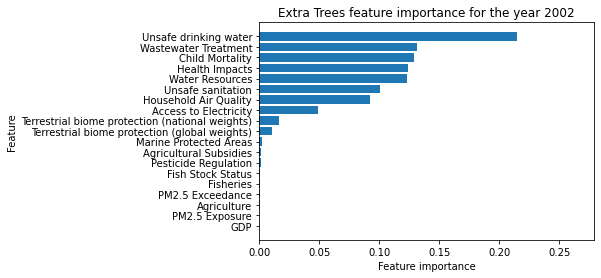

In [18]:
display.display(bars[0])

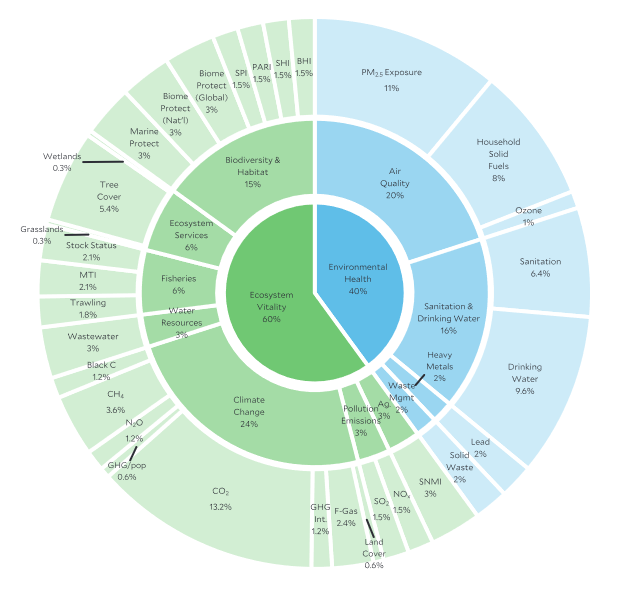

In [19]:
display.display(original_epi)

- Overall, the modeling of this dataset over time has shown us the constant importance of water and sanitation based metrics in predicting a country's EPI. 
- Drinking water is 9.6% of the 2020 EPI model, but is consistently higher than .2 in feature importance.
- Additionally, many metrics that are not used to calculate the 2020 EPI are accurate predictors of the EPI from 2002 to 2020, indicating that the methods used for calculating the EPI may not be accurately representing the data as a whole.

***Next section***

### Modeling by high and low performing countries:

The model selected for this portion of the project was an ExtraTrees regression model. This model was picked because it performed really well in scoring metrics, often scoring over 0.95 and not having problems with overfitting. The ExtraTrees model also has a good deal of interpretability, which is something we are very interested in for this project. Overall it won out over the linear regressions because it does not require holding all else equal, which allows us to compare the feature importances to each other. We were also unsure about using the linear regression constants because of the assumptions that we only partially met. 

In [20]:
features = []
for name, image in images['CountryExtraTrees'].items():
    if 'side' in name:
        features.append(image)

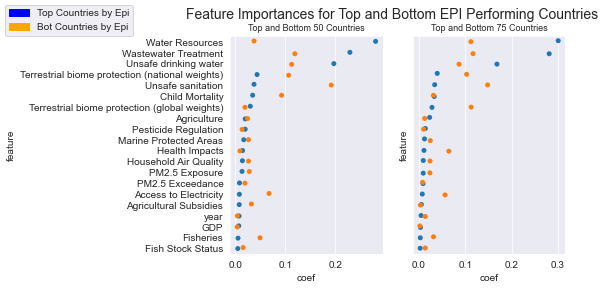

In [21]:
display.display(features[0])

This graph shows that there are certain categories that have large gaps in feature importance between the top countries and bottom countries for EPI performance. There are notable gaps for top performing countries, specifically in the water resources, wastewater treatment and unsafe drinking water categories. There are a lot of features that are carried at equal weight as well, but there are still notable difference in some categories. 

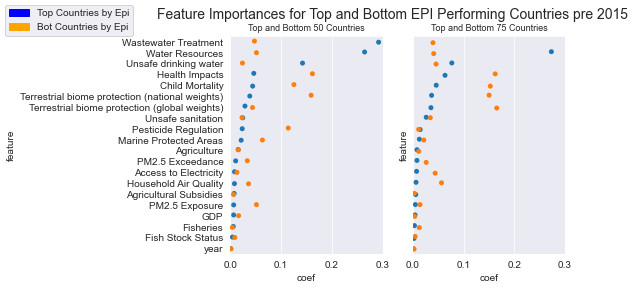

In [22]:
display.display(features[2])

This graph contains the feature importance score for top and bottom performing countries before the year 2015. In 2015 there was a major design change in the way the EPI was calculated. Comparing the feature weights before and after 2015 we can see if there were improvements in closing the gap between top and bottom performing countries. Specifically we want to look at the features with a big gap near the top of the figure.  

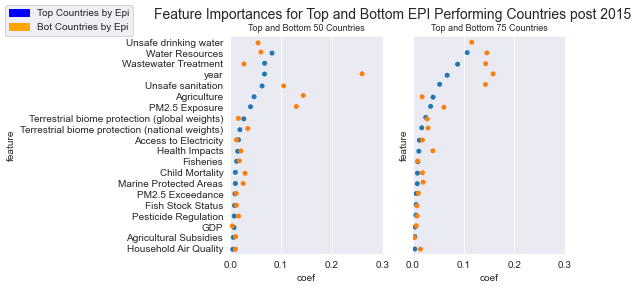

In [23]:
display.display(features[1])

After the changes to the EPI calculations in 2015, we can see that a lot of feature importances from top and bottom performing countries got closer together. notably the top 7 most important features which were very spread out before 2015, are a lot closer together after 2015, suggesting that the reworking of the EPI scoring system did show some improvement in top performer vs bottom performer discrepancies. 

In [24]:
diffs = []
for name, image in images['CountryExtraTrees'].items():
    if 'difference' in name:
        diffs.append(image)

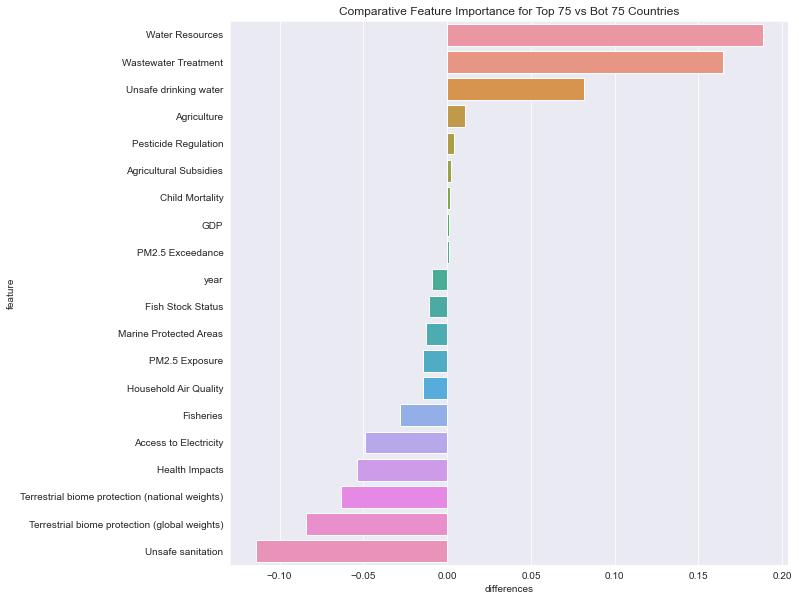

In [25]:
diffs[0]

This chart shows the differences in Feature importances between top performing countries and bottom performing countries. As you can see Water Resources, Wastewater Treatment, and Unsafe drinking water are all much stronger predictors of EPI for higher performing countries than low performing countries. The features that are better predictors of EPI low performing countries are Unsafe Sanitation and the terrestrial biome protection features. 

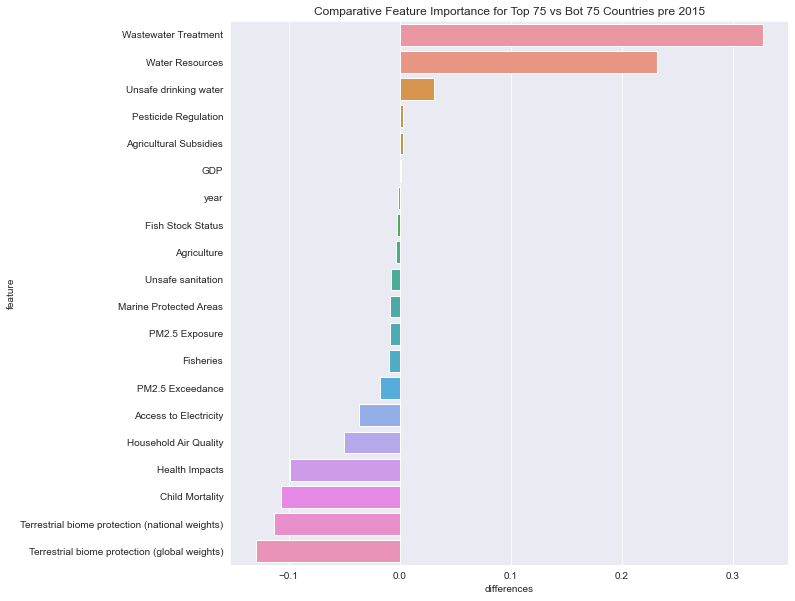

In [26]:
diffs[2]

These are the pre 2015 feature importance differences between top performing and bottom performing countries. When compared with the post 2015 feature importances we hope to see a decrease in the spread of the importances. That would be shown by smaller bars, and hopefully most will be closer to zero. 

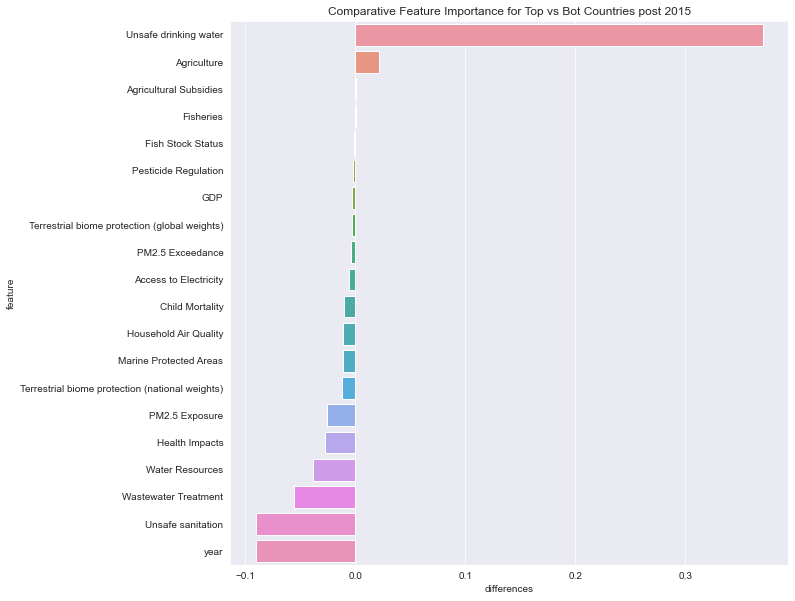

In [27]:
diffs[1]

This confirms what we had seen in the previous graph. The differences between the top and smaller country feature importances get smaller and closer to zero. The exception again is unsafe drinking water which seems to always have a stronger feature importance in top EPI performing countries than bottom performing countries. 

### GDP analysis:

In [28]:
GDP = []
for name, image in images['CountryGDPExtraTrees'].items():
    if 'GDP' in name:
        GDP.append(image)

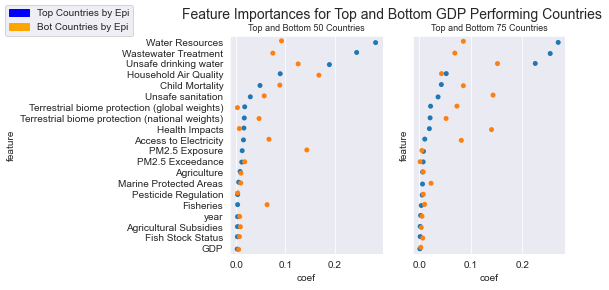

In [29]:
GDP[4]

Looking at the top and bottom countries by GDP this time we see similar features being selected for the feature importance category. Water Resources and Wastewater Treatment still find there way to the top of the features for high GDP countries vs low GDP countries. 

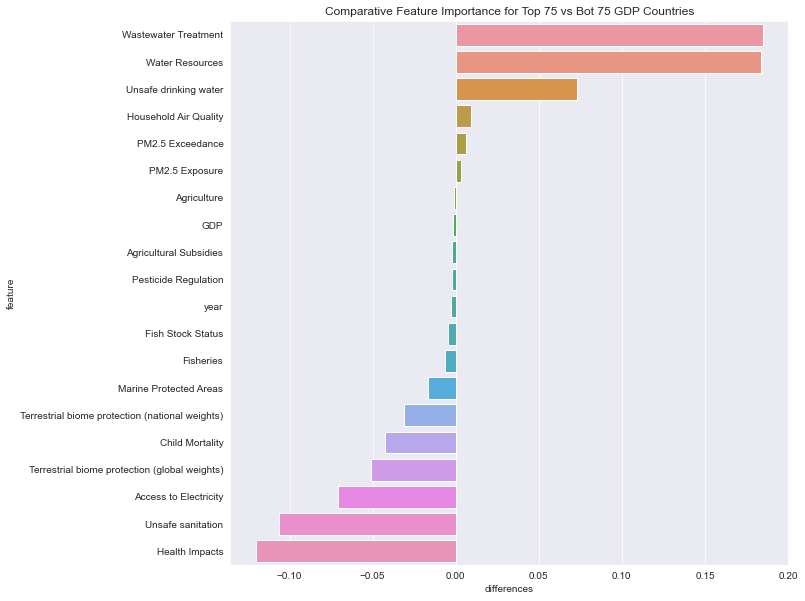

In [30]:
GDP[1]

The difference graph confirms what the pattern appeared to show in the earlier mentioned graph. The bars far to the right indiciate those were better predictors for EPI for high GDP countries vs the bars to the left showing better indicators for EPI in lower GDP countries. 

Overall these GDP results leave a lot more questions than answers. Finding a way to dig deeper into the effect of the GDP on EPI scores might carry a lot more weight into analyzing the EPI and how it's calculated. Looking more into feature analysis and comparing those results with GDP figures could prove rewarding. Also looking at features such as the GDP per capita could help to further solidify the findings of the review.  

### Linear Regression Coefficients:

In [31]:
coefs = []
for name, image in images['CountryCoefCatplots'].items():
    if 'side' in name:
        coefs.append(image)

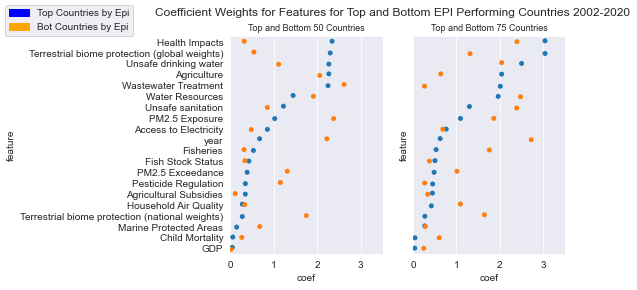

In [32]:
coefs[0]

These are the ridge regularized linear regression coefficients for the top and bottom EPI performing countries. As you can see they are a lot more spread out than the feature importances from the extra trees. There are some new arrivals to the big difference categories, however the same water features are still suffering from a large gap between the top and bottom performing countries. 

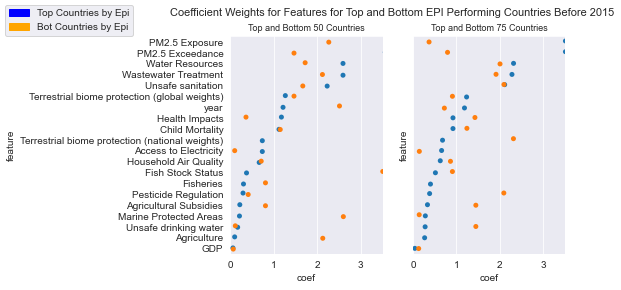

In [33]:
coefs[2]

Looking at the coefficients from before 2015, targets are all spread out, with very few coefficients being equally valued between top and bottom performing EPI countries. 

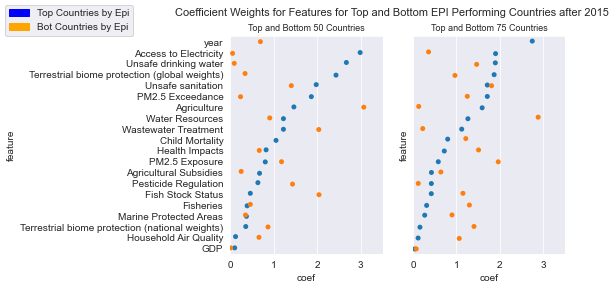

In [34]:
coefs[1]

The big changes in the way the EPI was calculated did bring in some of the features, but there are still very big differences between the way the EPI is being predicted for top and bottom beforming countries. We saw a bigger impact of the changes in the extratrees model, but that could be because of the way extra trees models work vs linear regressions. 

In [35]:
coef_diffs = []
for name, image in images['CountryCoefCatplots'].items():
    if 'diff' in name:
        coef_diffs.append(image)

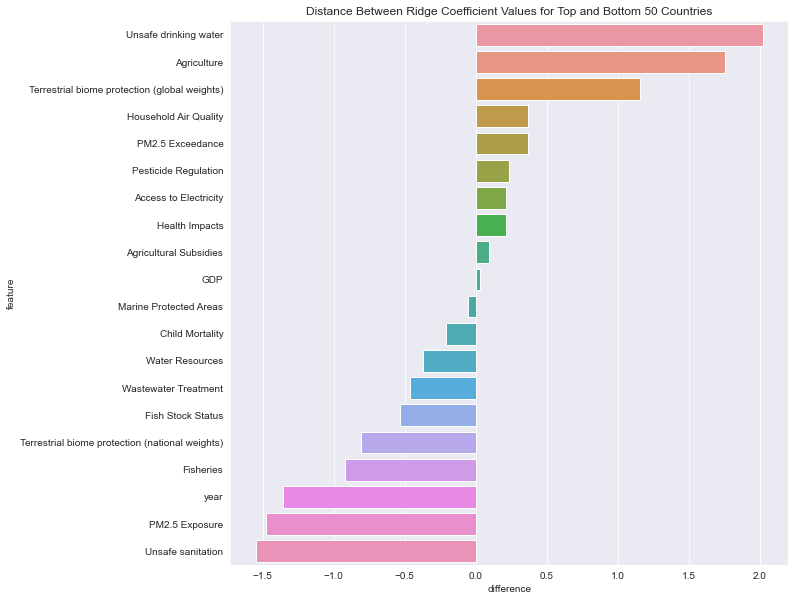

In [36]:
coef_diffs[0]

With the difference in coefficients here you can see some of the same features having high importance, but also a few newcomers. The agriculture score as well as the pm2.5 exceedance were not as strongly considered by the extra trees model. This shows that top performing countries are scored on much different variables. Strangely, in contrast to the extra trees model the wastewater treatment is now shown being a better predictor for lower performing countries. 

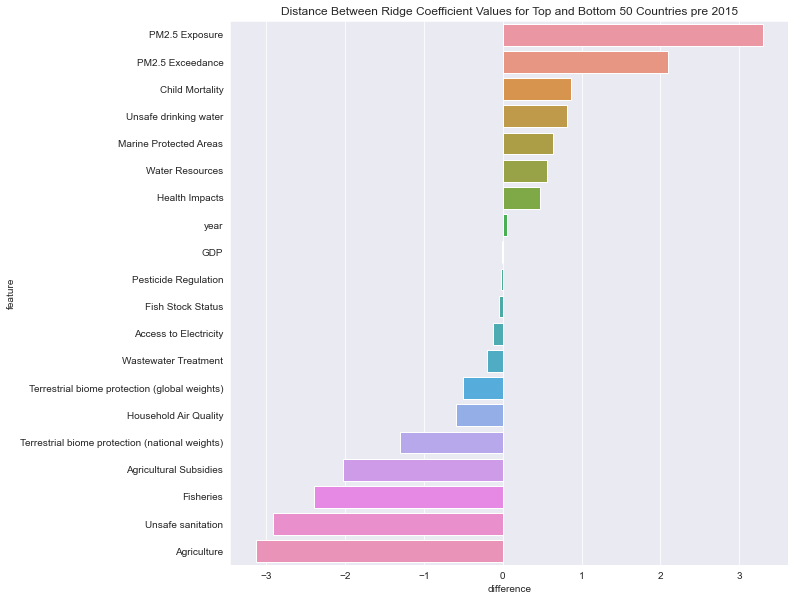

In [38]:
coef_diffs[2]

Before the EPI calculation changes in 2015, the pm2.5 exposure and exceedance were the best predictors of EPI in top performing countries while agriculture subsidies and unsafe sanitation were the best indicators for low performing country EPI. 

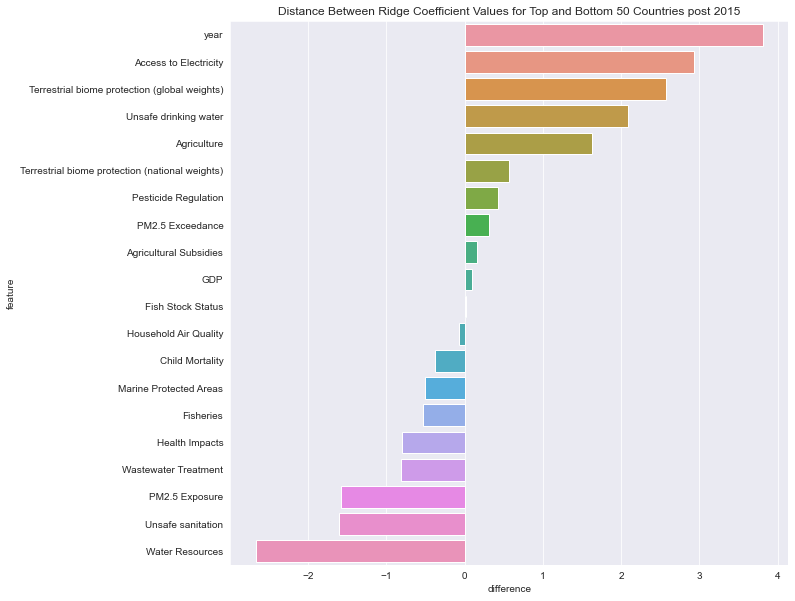

In [39]:
coef_diffs[1]

After the rule changes some of the features were brought closer together, and overall the top and bottom scoring countries were scored more similarly. The year feature became the strongest indicator which I believe is an artifact of there not being as much data for the post 2015 scores, in time this chart might come to show that the rule changes did have an impact, but right now it looks like they didnt do a great job in removing the difference in scoring between top and bottom performing countries. 

Overall the linear coefficient analysis seemed to be the more compelling of the two types of analysis. Going forward with the project we will aim to improve our coefficient analysis and do a full feature analysis. Also comparing country GDP with the linear coefficients could yield significant results.